<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>


- Classification summary
- Logistic regression
- Support Vector Machine
- Intro to kernel methods
<hr/>


### Classification methods

- $k$ Nearest Neighbor
- Naive Bayes
- Quadratic Discriminant Analysis
- Linear Discriminant Analysis
- Decision trees
- Random forests
- Logistic regression
- Support Vector Machines


<h1><font color="darkblue">Logistic Regression</font></h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png" width=300 align=right>

Consider binary classification and fit the probability

The **logistic function** is sigmoid:

> $\displaystyle \sigma(t) = \frac{1}{1+e^{-t}}$

Cf. Posterior as fn of the log Bayes factor

### Simple binary classification in 1D

1. Plug in a linear model $t=\beta^T \phi(x)$, as we did for linear regression
2. Fit the log of the probability ratio of the classes, e.g., 

> $\displaystyle \log \frac{ {P}(C_1| x)}{ {P}(C_0| x)} = \beta_0 + \beta_1 x$
>
> where 
>
> $\displaystyle {P}(C_0| x) = 1 - {P}(C_1| x)$
> 
> hence
>
> $\displaystyle P(C_1|x) = \frac{1}{1+e^{-(\beta_0+\beta_1 x)}}$



### Fit & Predict

- Traning set $\big\{(x_i, c_i)\big\}$ 
> $ \displaystyle \text{logit} \big( \pi(x) \big) = \log \left[ \frac{\pi(x)}{1-\pi(x)} \right] = \beta_0 + \beta_1 x \qquad $ where $ \displaystyle \qquad \pi(x) = {P}(C_1| x) $

- **Fit**: maximize the log of
> $ \displaystyle \mathcal{L}(\beta) = \prod\limits_{i:\,
c_i = 1} \pi(x_i; \beta) \  \prod\limits_{j:\,c_{j} = 0} \big[1 - \pi(x_j; \beta)\big] $
>
> $ \displaystyle \hat{\beta} = \arg \max_{\beta}  \log \mathcal{L}(\beta) $

- **Predict**: evaluate
> $ \displaystyle P(C_1|x) = \pi\big(x;\hat{\beta}\big) \quad$vs.$\quad{} P(C_0|x)=1- \pi\big(x;\hat{\beta}\big)$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Binary classification with 1-dimensional features 

Classes: [0 1]
Data: (100, 1)


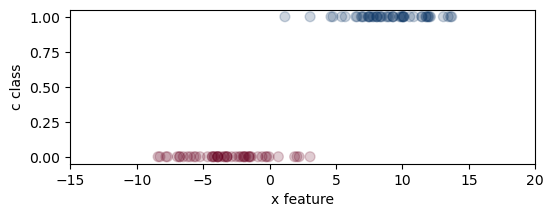

In [2]:
from sklearn import datasets

np.random.seed(42)
X, c = datasets.make_blobs(n_features=1, centers=2, cluster_std=3)

print('Classes:', np.unique(c))
print('Data:', X.shape)

plt.figure(figsize=(6,2))
plt.scatter(X, c, c=c, s=50, alpha=0.2, cmap=plt.cm.RdBu)
plt.xlabel('x feature')
plt.ylabel('c class')
plt.xlim(-15,20);

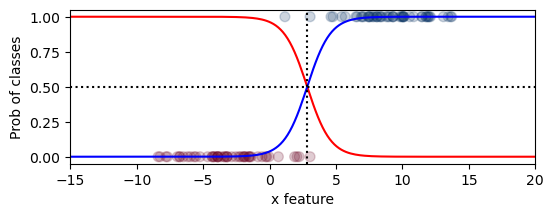

In [3]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,c)

XX = np.linspace(-15,20,200)[:, np.newaxis]
cc = clf.predict_proba(XX)

plt.figure(figsize=(6,2))
plt.scatter(X, c, c=c, s=50, alpha=0.2, cmap=plt.cm.RdBu)
plt.xlabel('x feature')
plt.ylabel('Prob of classes');

plt.plot(XX, cc[:,0], c='r');
plt.plot(XX, cc[:,1], c='b');
plt.axhline(y=0.5, color='k', linestyle=':')
plt.axvline(x=2.8, color='k', linestyle=':')
plt.xlim(-15,20);

### Iris Dataset: 2D only - classes 0 vs 1

In [4]:
iris = datasets.load_iris()
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

In [5]:
# grid for plotting
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
                  np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))

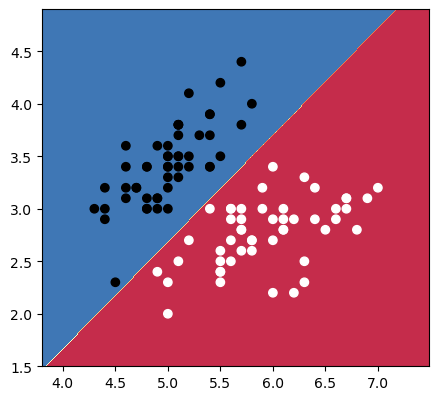

In [6]:
# 2D model with x and y coordinates
clf = LogisticRegression()
clf.fit(X,c)

z = clf.predict(np.c_[x.ravel(),y.ravel()]).reshape(x.shape)
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1, aspect='equal')
plt.contourf(x,y,z, cmap=plt.cm.Spectral_r)
plt.scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);

### Iris Dataset: 2D only - classes 1 vs 2

In [7]:
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c>0 # classes 1 and 2
X,c = X[subset,:], c[subset]

# grid for plotting
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
                  np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))

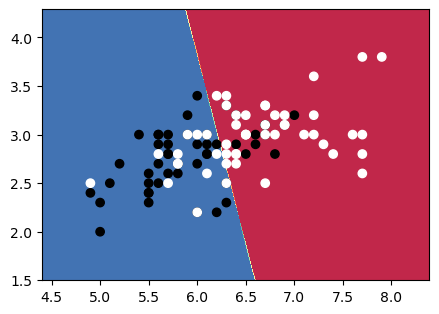

In [8]:
# 2D model with x and y coordinates
clf = LogisticRegression()
clf.fit(X,c)

z = clf.predict(np.c_[x.ravel(),y.ravel()]).reshape(x.shape)
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1, aspect='equal')
plt.contourf(x,y,z, cmap=plt.cm.Spectral_r)
plt.scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);

### Multiple classes

> $ \displaystyle l(\beta) = \sum_{i=1}^{n} \log \pi_{g_i}(x_i; \beta) \qquad $ where $ \displaystyle \qquad \pi_{k}(x_i; \beta) = {P}(C_k \ | x_i; \  \beta) $



### Discriminative Probabilistic Approach

This is **discriminative** as opposed to the previous probabilistic methods that were **generative** and could, for example, provide random samples using the learned $p(x|C_k)$ likelihoods of the classes $\{C_k\}$.

<h1><font color="darkblue">Support Vector Machines aka SVM</font></h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png" align=right width=300>


- Pick the best hyperplane to separate classes
- Generalization to sets of hyperplanes
- Also kernel variants - more on this later




### Hard margin: linearly separable classes

<!-- <img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" align=right width=300> -->
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1280px-SVM_margin.png" align=right width=300>

- Maximize distance to either classes


**Distance of hyperplanes**
1. Pick a point $x_0$ on hyperplane $w^T x - b = -1$ 
2. Shift it along $w$ by unknown distance $d$ to be on $w^T x - b = 1$  
3. Express $d$ from the equations:
$$\displaystyle d = \frac{2}{|\!| w |\!|}$$


### Optimization problem

Maximize the gap such that all points are on the "correct side".

Using coordinate geometry, the gap is calculated to be $2|\!| w |\!|^{-1}$, <br>
so we can solve

$\quad \min |\!| w |\!|_2^2 $ 

s.t.

$\quad w^T x_i - b \ge \ 1 \ \quad \forall i: y_i=1$ 

$\quad w^T x_i - b \le -1 \quad \forall i: y_i=-1$

### Equivalently

Because $y_i$ only take values in -1 or 1, the constraints simplify

$\quad\min |\!| w |\!|_2^2 $ 

s.t.

$\quad(w^T x_i - b)\cdot{}y_i \ge 1 \quad \forall i$ 



### Support Vectors

The final fit depends on the closes points in each class. 
These are the support vectors.

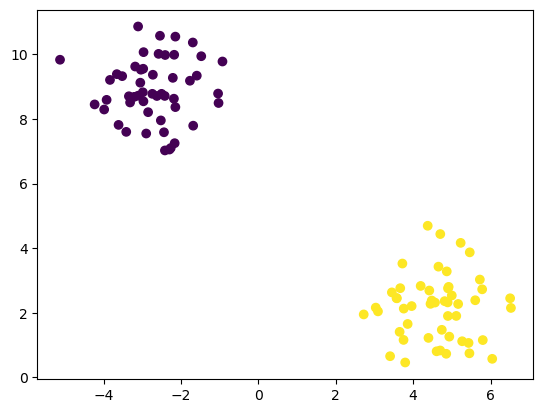

In [9]:
X, c = datasets.make_blobs(n_samples=100, centers=2, random_state=42)
plt.scatter(X[:,0], X[:,1], c=c);

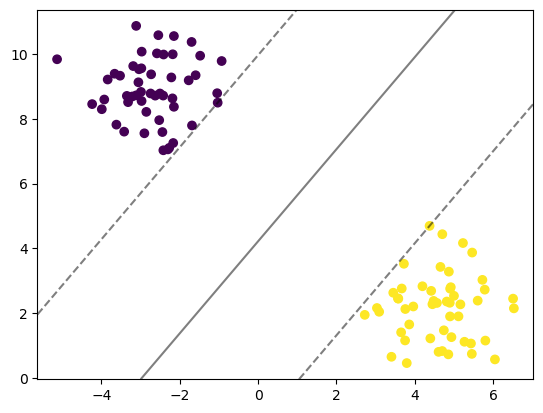

In [10]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X, c)

# Create grid to evaluate model
x = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
y = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)

YY, XX = np.meshgrid(y, x)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=c);

## Iris dataset

In [11]:
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

# grid for plotting
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
                  np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))

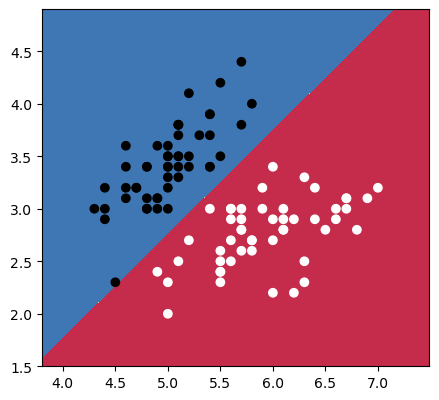

In [12]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X,c)

z = clf.predict(np.c_[x.ravel(),y.ravel()]).reshape(x.shape)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1, aspect='equal')
plt.contourf(x,y,z, cmap=plt.cm.Spectral_r)
plt.scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);

### Soft margin: classes are not separable

SVM is extended to tolerate but minimize interlopers.

$\displaystyle \quad(\hat{w}, \hat{b}) = \textrm{argmin} \big[ |\!| w |\!|_2^2 + C \sum_i \max\big\{0, 1-(w^T x_i\!-\!b)\cdot{}y_i) \big\} \big]$

where $C$ is a new parameter: the importance of (avoiding) interloppers.

In [13]:
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c>0 # classes 1 and 2
X,c = X[subset,:], c[subset]

# grid for plotting
h = 0.01
x,y = np.meshgrid(np.arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
                  np.arange(X[:,1].min()-.5, X[:,1].max()+.5, h))

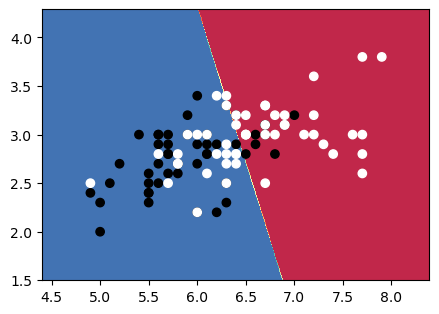

In [14]:
# 2D model with x and y coordinates
clf = SVC(kernel='linear', C=0.01)
clf.fit(X,c)

z = clf.predict(np.c_[x.ravel(),y.ravel()]).reshape(x.shape)
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1, aspect='equal')
plt.contourf(x,y,z, cmap=plt.cm.Spectral_r)
plt.scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);

### Kernel methods

 - Data transformation $x$ to $\phi(x)$ 
 - Use the same methods as before on transformed data

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b1/Svm_8_polinomial.JPG" align=left width=400>

### Kernel trick

- Similarity of $x$ and $x'$ in general

- Inner product

>$ \displaystyle k(x,x') = \phi(x) \cdot \phi(x')$



### Kernel functions

- We don't even need to think about $\phi(\cdot)$

- Different kernel functions, e.g.,

> Polynomial
>
>$\ \ \ \ \ \ \displaystyle k(x,y) = ( x^T y + c)^d$

> RBF (radial basis function)
>
>$\ \ \ \ \ \ \displaystyle k(x,y) = \exp\left\{-\frac{(x-y)^2}{2\sigma^2}\right\}$



### Kernel variants

- Kernel regression
- Kernel PCA
- Kernel SVM
- Kernel whatever-makes-sense

### Comparison of Classifiers

 - Check out the 
<a href="http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">demo script</a> running a bunch of classifiers in sklearn 


- **Exercise!** Run the script for the classifiers we discussed to compare the results

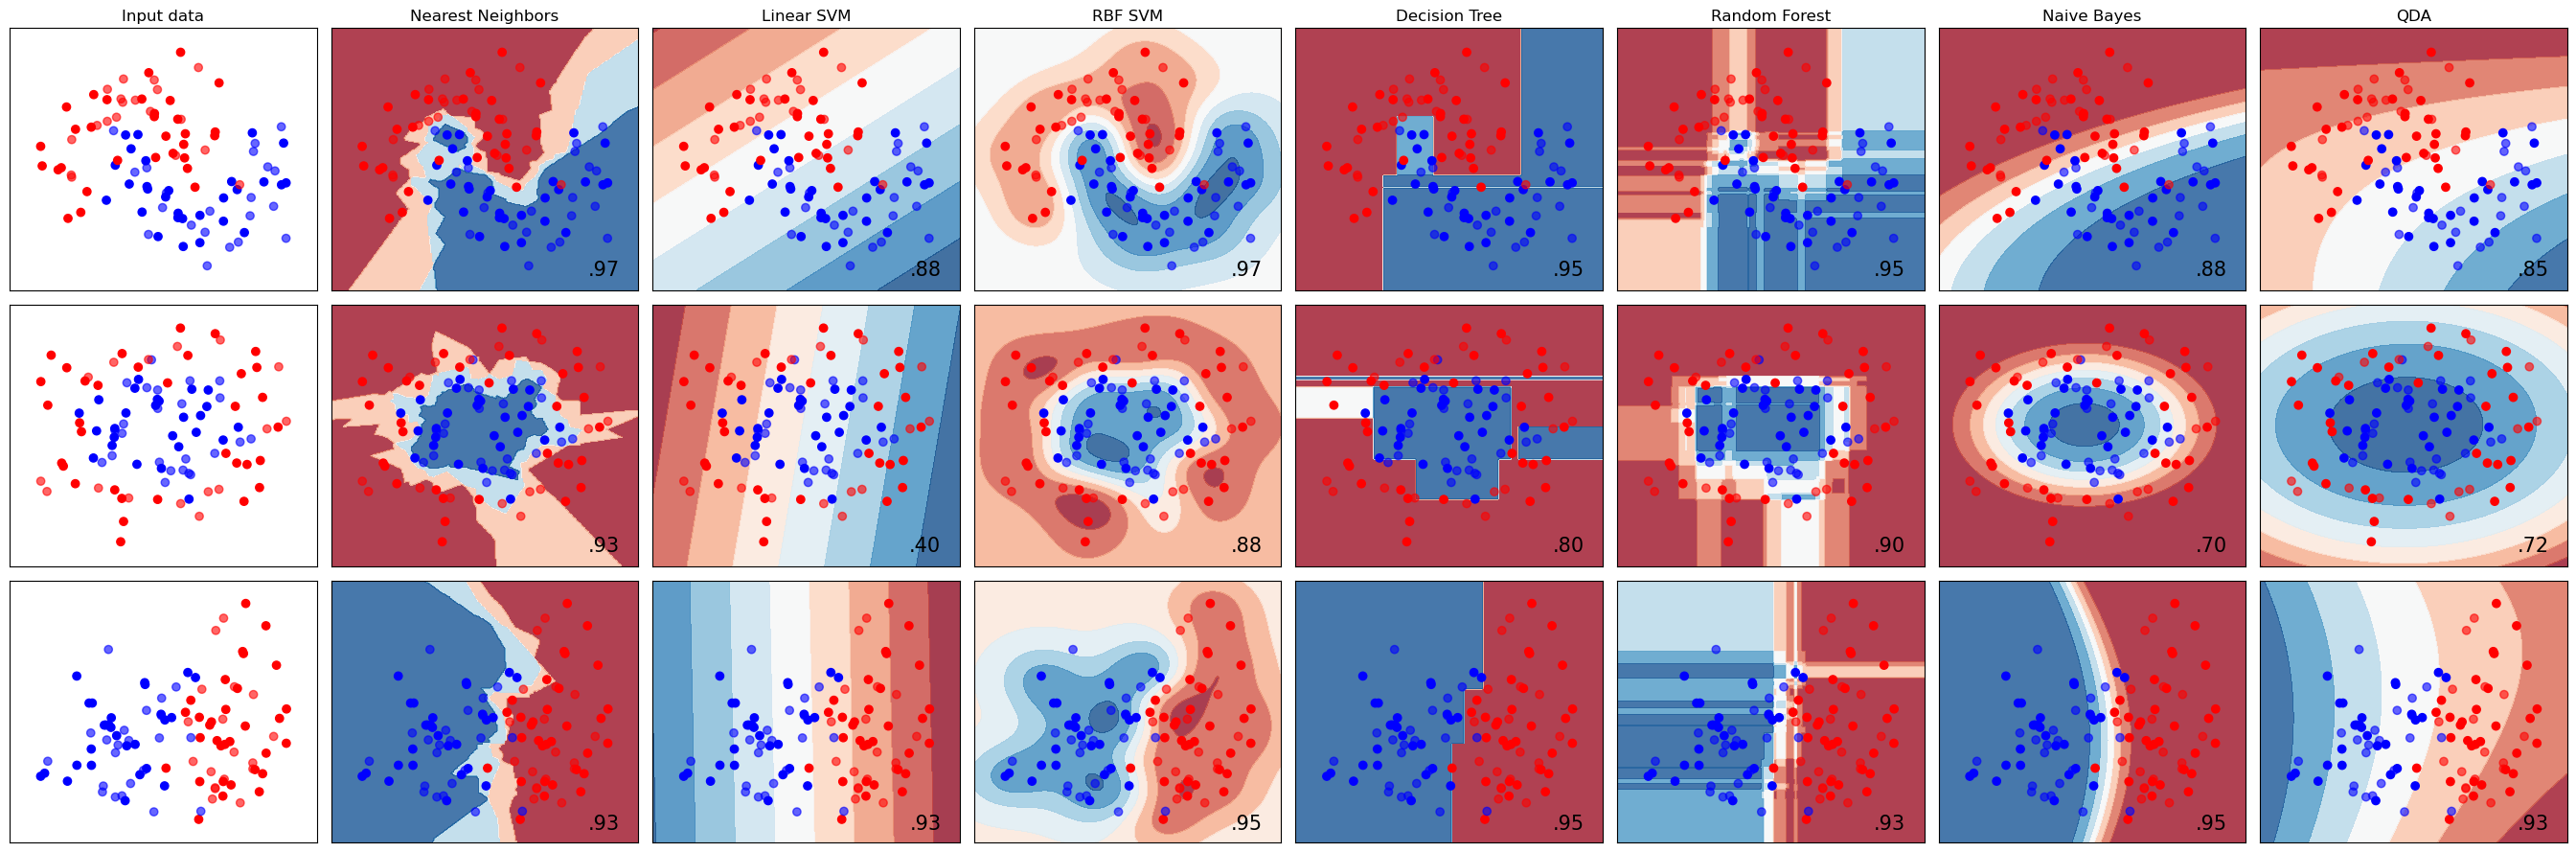

In [15]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", #"Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1),
    #AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()